# Simple Linear Regression
In this model building exercise we are trying to predict `Sales` using an appropriate predictor variable

1. Reading and understanding the data
2. Training the model
3. Residual analysis (specific to linear regression)
4. Predicting on the test set and evaluating the model

## 1. Reading and understanding the data

In [12]:
# importing libraries
import numpy as np
import pandas as pd

In [13]:
advertising  = pd.read_csv('advertising.csv')

In [14]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
advertising.shape

(200, 4)

In [16]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='Radio', ylabel='Sales'>

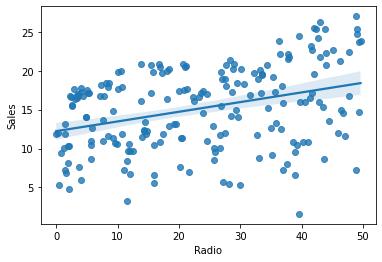

In [17]:
# visualizing the data for a better understanding
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Radio', y='Sales', data=advertising)

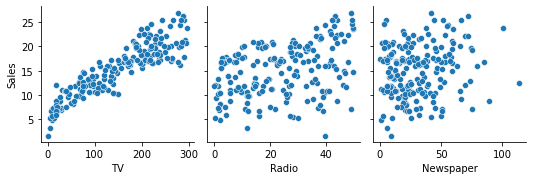

In [18]:
sns.pairplot(y_vars='Sales', x_vars=['TV', 'Radio', 'Newspaper'], data=advertising)

In [19]:
advertising.corr() #correlations are not so friendly to deduce intuitions. so we need heatmap to visualize them

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

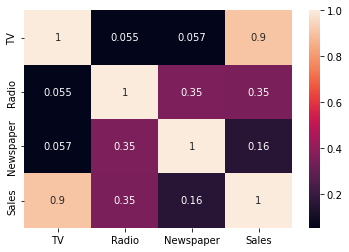

In [20]:
sns.heatmap(advertising.corr(), annot=True)

## 2. Train the model

In [21]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

## Steps:
- create x and y
- create train and test sets (70-30, 80-20)
- train your model on train set
- evaluate your model on both sets

In [22]:
# create x and y
x = advertising['TV']
y = advertising['Sales']

In [23]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=100) #random state is like a tag for a particular train-test split. if we want same train set every time, we can use the same random_state number

## NOTE:
we can use the statsmodel or sklearn to train the model. but the statsmodel by default assumes the y-intercept in the linear regression as 0. so this cannot be accepted untill we are sure that the intercept is really 0.

In [24]:
#training the model
x_train_sm = sm.add_constant(x_train)
x_train_sm.head()

#y = c*const+m1*TV - this is how the statsmodel takes the equation

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [25]:
# fitting the model
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [26]:
lr_model.summary() #only statsmodel summary gives you such a detailed summary of the model. sklearn doesn't give you such a summary. this is one of the advantage of the statsmodel

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.52e-52
Time:                        07:57:20   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations:
* coefficient and p-value: p-value is low which means the coefficients are significant - very good

* R-square is 81.6% which is very high and hence (correlation is not equal to causation) TV and sales are highly correlated. - very good

* prob(F-statistic) : is low which means fit is not purely by chance. - very good

In [27]:
y_train_predicted = lr_model.predict(x_train_sm)

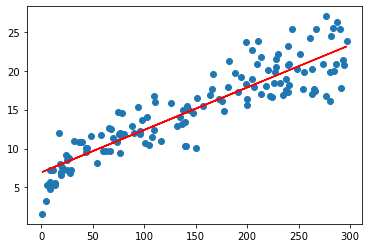

In [28]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_predicted, 'r')
plt.show()

## 3. Residual analysis

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


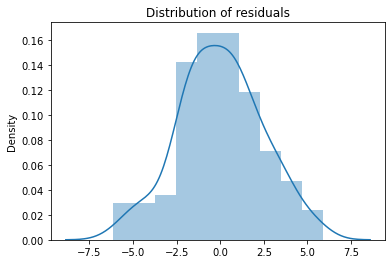

In [29]:
# residual analysis is actually distribution of error terms.
# error = f(y_train, y_train_predicted)
res = y_train - y_train_predicted
plt.figure()
sns.distplot(res)
plt.title("Distribution of residuals")
plt.show()

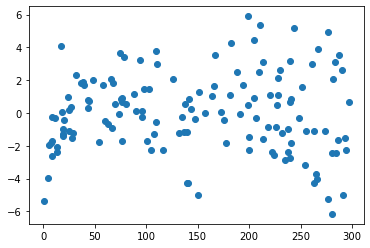

In [30]:
# see patterns in residuals (should not see any pattern)
plt.scatter(x_train, res)
plt.show()

in the above step, the residuals should be distributed in random manner around the y=0 line which is as seen from the scatter plot

## 4. Prediction and analysis on the test set

In [31]:
# make predictions on the test set (y_test_pred)
# evaluate the model, r_square on the test set

In [32]:
x_test_sm = sm.add_constant(x_test)
y_test_predicted = lr_model.predict(x_test_sm)

In [33]:
# to evaluate the model, we need to import mean_squared_error and r2_score from the sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
r2 = r2_score(y_true = y_test, y_pred = y_test_predicted)
r2

0.7921031601245658

In [35]:
# mean_squared_error
mean_squared_error(y_true = y_test, y_pred = y_test_predicted)

4.077556371826956

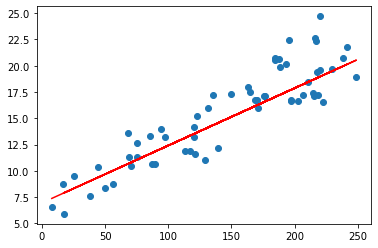

In [36]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_predicted, 'r')
plt.show()

## Linear Regression using `Sklearn`

In [37]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=100) #random state is like a tag for a particular train-test split. if we want same train set every time, we can use the same random_state number

### steps in sklearn model building
1. Create a linear regression model
2. Fit the model
3. See the parameters and make predictions
4. evaluate the model using r2 etc.

In [40]:
from sklearn.linear_model import LinearRegression

In [49]:
x_train_lm = x_train.values.reshape(-1,1)
x_test_lm = x_test.values.reshape(-1,1)

In [45]:
# 1. Create a linear regression model
lm = LinearRegression()
# 2. Fit the model
lm.fit(x_train_lm, y_train)

LinearRegression()

In [48]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [51]:
# 3. See the parameters and make predictions
print(lm.coef_)
print(lm.intercept_)

y_train_pred = lm.predict(x_train_lm)
y_test_pred = lm.predict(x_test_lm)

[0.05454575]
6.94868320000136


In [52]:
# 4. evaluate the model using r2 etc.
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8157933136480388
0.792103160124566
